# Window Functions and Spectral Leakage

Refs:
+ [Wikipedia article](https://en.wikipedia.org/wiki/Window_function) on **Window Function**
+ [Wikipedia article](https://en.wikipedia.org/wiki/Spectral_leakage) on **Spectral Leakage**
+ [Wikipedia article](https://en.wikipedia.org/wiki/Linear_time-invariant_system) on **LTI Systems Theory**


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Spectral Leakage

The Fourier transform of a function of time, $s(t)$, is a complex-valued function of frequency, $S(f)$, often referred to as a frequency spectrum

Any linear time-invariant operation on $s(t)$ produces a new spectrum of the form $H(f){\cdot}S(f)$, which changes the relative magnitudes and/or angles (phase) of the non-zero values of $S(f)$.

Any other type of operation creates new frequency components that may be referred to as **spectral leakage** in the broadest sense.

## Windowing

The term 'leakage' usually refers to the effect of **windowing**, which is the product of $s(t)$ with a different kind of function, the **window function**. Window functions happen to have finite duration, but that is not necessary to create leakage. Multiplication by a time-variant function is sufficient.

Leakage caused by a window function is most easily characterized by its effect on a sinusoidal $s(t)$ function, whose unwindowed Fourier transform is zero for all but one frequency.

In [75]:
def plot_sig(s_t, Fs, w_length):
    """Plot time series and DFT magnitude of signal s_t"""
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 4))
    ax1.plot(np.real(s_t))
    freqs = np.fft.fftfreq(w_length, d=1/Fs)
    mags = np.absolute(np.fft.fft(s_t))
    ax2.stem(np.fft.fftshift(freqs),
             np.fft.fftshift(mags))
    return fig, (ax1, ax2)

In [73]:
# Generate a sinusoid with 1 frequency

cycles = 2
f = 2.0 # Hz
w_length = 256 # window length

Fs = w_length/(1/f)*cycles # sampling freq (samples/sec)
t = np.linspace(0, cycles/f, w_length)
s_t = np.exp(-1j*2*np.pi*f*t)

(<Figure size 1152x288 with 2 Axes>, (<AxesSubplot:>, <AxesSubplot:>))

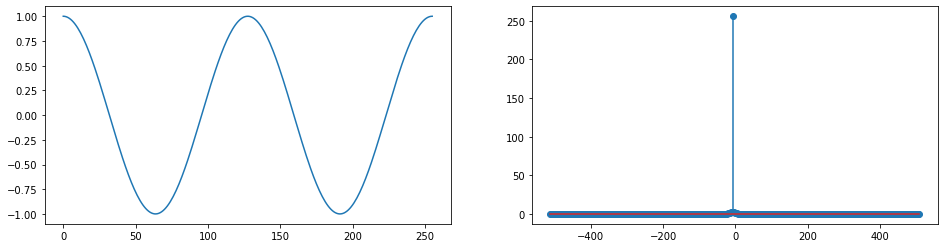

In [76]:
# Plot unwindowed s_t
#
# NOTE: quantization into discrete samples creates some spectral leakage, as seen in
#       the slight "ripple" around the DFT maximum below.

plot_sig(s_t, Fs, w_length)

Try a **triangle** windowing function (i.e., 2nd order B-spline window)

(<Figure size 1152x288 with 2 Axes>, (<AxesSubplot:>, <AxesSubplot:>))

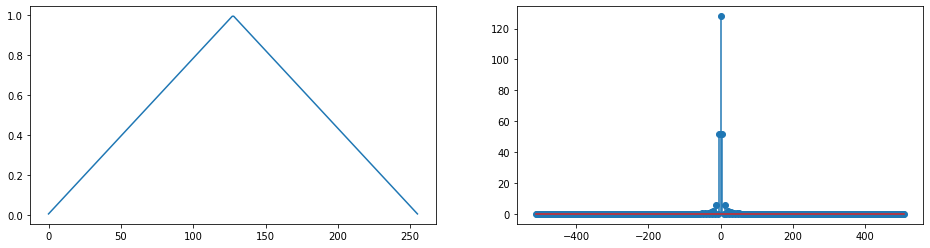

In [83]:
window = signal.get_window(('triang'), w_length, fftbins=False)
plot_sig(window, Fs, w_length)

(<Figure size 1152x288 with 2 Axes>, (<AxesSubplot:>, <AxesSubplot:>))

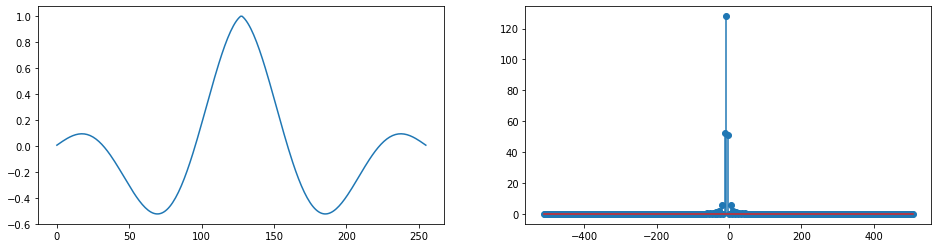

In [84]:
plot_sig(window*s_t, Fs, w_length)

## Windowing Symmetry

Window sequences can be either **symmetric** or 1-sample short of symmetric (called asymmetric or **periodic**).  An even-length symmetric sequence has two equal center-points, but most window functions used in practice have a single peak value, whether they are symmetric or asymmetric.

The `fftbins` argument for the `scipy.signal` function `get_window()` specifies whether the resulting window sequence will be symmetric or periodic.

For instance, a symmetric sequence, with its maximum at a single center-point, is generated by the `scipy.signal` function `get_window()` with the `fftbins` argument set to `False`, with an odd number of points `n` specified.  To generate a periodic (i.e. asymmetric) sequence, set `fftbins` to `True`.

The [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.get_window.html#scipy.signal.windows.get_window) for `scipy.signal.get_window()` indicates there are implications for symmetry when applying a windowing sequency to a DFT.

Text(0.5, 1.0, 'Periodic (Asymmetric) Window')

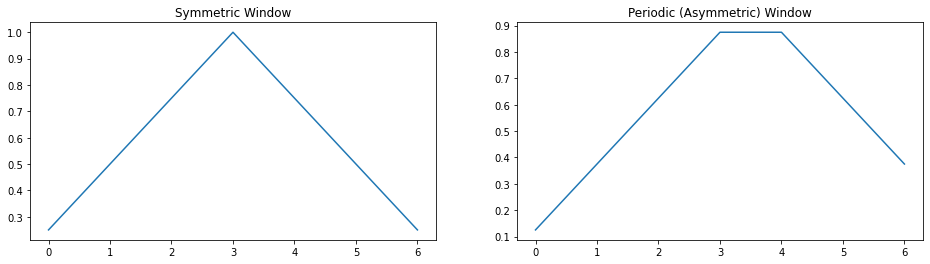

In [92]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (16, 4))
ax1.plot(signal.get_window(('triang'), 7, fftbins=False))
ax1.set_title('Symmetric Window')
ax2.plot(signal.get_window(('triang'), 7, fftbins=True))
ax2.set_title('Periodic (Asymmetric) Window')

(<Figure size 1152x288 with 2 Axes>, (<AxesSubplot:>, <AxesSubplot:>))

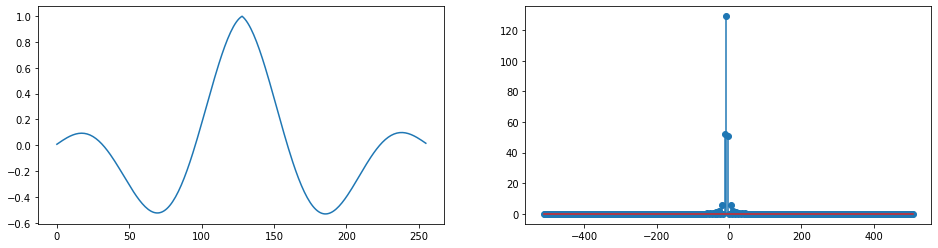

In [82]:
window = signal.get_window(('triang'), w_length, fftbins=True)
plot_sig(window*s_t, Fs, w_length)